In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
data[data.Age==min(data.Age)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [7]:
data.isna().sum()/data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [15]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
data.groupby(['Sex'])['Fare'].median()

Sex
female    23.0
male      10.5
Name: Fare, dtype: float64

In [25]:
data.shape

(891, 12)

In [29]:
data.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [32]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

In [34]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [37]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [51]:
contengency_pclass = pd.crosstab(data.Survived,data.Pclass)
contengency_pclass

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<AxesSubplot:xlabel='Survived', ylabel='count'>

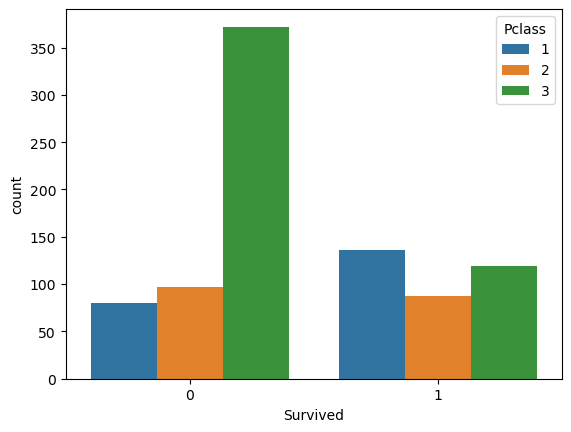

In [40]:
'''Diagram en tuyaux d'orgues où survived est discrétisée en fonction de la classe de voyage
du passager'''
sns.countplot(x='Survived',hue='Pclass',data=data)

In [127]:
# Hypothèses 
# H0 = La survie d'une personne est indépendante de sa classe de voyage
# H1 = La survie d'une personne est associée à sa classe de voyage
from scipy.stats import chi2_contingency,levene,f_oneway
p_value = chi2_contingency(contengency_pclass,correction=True)
'''chi2_contingency: calcul la statistique de khi2 et la pValeur pour le test d'hypothèse d'indépendance des fréquences
observées dans le tableau de contingence'''

In [75]:
def hypothesis_test(val):
    return "H1 retenue" if (val<0.05) else "H0 retenue"
    
hypothesis_test(p_value[1])

'H1 retenue'

In [64]:
contengency_sex = pd.crosstab(data.Survived,data.Sex)
contengency_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


In [65]:
p_value = chi2_contingency(contengency_sex,correction=True)
hypothesis_test(p_value[1])

'H1 retenue'

In [151]:
df=data[(data.Survived==1)]
df.Parch.median()

0.0

In [68]:
contengency_em = pd.crosstab(data.Survived,data.Embarked)
contengency_em

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [69]:
p_value1 = chi2_contingency(contengency_em,correction=True)
hypothesis_test(p_value1[1])

'H1 retenue'

<AxesSubplot:xlabel='Survived', ylabel='count'>

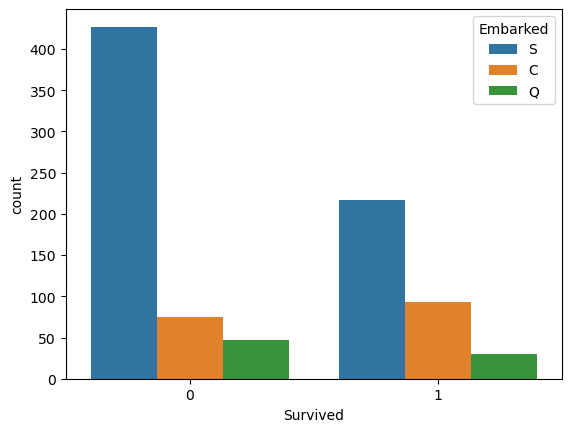

In [74]:
sns.countplot(x='Survived',hue='Embarked',data=data)